In [1]:
import os
import pandas as pd
import tensorflow as tf
import sys
sys.path.append("../src")
from cleaning import clean_and_label_data
from preprocessing import preprocess_for_model
from models import train_model
from evaluate import evaluate_model

dataset_paths = [
    '../data/marine_water_quality-2.csv',
    '../data/marine_water_quality-3.csv',
    '../data/marine_water_quality-4.csv',
    '../data/marine_water_quality-5.csv',
    '../data/marine_water_quality-6.csv'
]

# === Models to Evaluate ===
model_names = ['KNN', 'NaiveBayes', 'SVM', 'LogisticRegression', 'SGD']
results = []


In [2]:
# === Clean and check datasets ===
print("Cleaning and labeling datasets...")
all_dfs = []
for path in dataset_paths:
    df = clean_and_label_data(path)
    if df.empty or 'label' not in df.columns:
        print(f"[WARNING] Skipping {path} — No valid data after cleaning or missing labels.")
        continue
    all_dfs.append(df)

# === Proceed only if at least one dataset is valid ===
if not all_dfs:
    raise ValueError("No valid datasets available after cleaning. Please check the data files.")

# === Preprocessing all datasets together ===
print("Preprocessing combined dataset...")
(X_train, X_test, y_train, y_test), label_encoder = preprocess_for_model(all_dfs)

# === Device configuration ===
device = '/device:GPU:0' if tf.config.list_physical_devices('GPU') else '/cpu:0'

Cleaning and labeling datasets...
[Cleaned] ../data/marine_water_quality-2.csv — Dropped 146 rows with missing key features
[Cleaned] ../data/marine_water_quality-3.csv — Dropped 85 rows with missing key features
[Cleaned] ../data/marine_water_quality-4.csv — Dropped 358 rows with missing key features
[Cleaned] ../data/marine_water_quality-5.csv — Dropped 92 rows with missing key features
[Cleaned] ../data/marine_water_quality-6.csv — Dropped 2941 rows with missing key features
Preprocessing combined dataset...


In [3]:
# === Train and evaluate each model ===
with tf.device(device):
    for model_name in model_names:
        print(f"Training model: {model_name}")
        model = train_model(X_train, y_train, model_name)
        metrics = evaluate_model(model, X_test, y_test, label_encoder)
        metrics.update({'Model': model_name})
        results.append(metrics)

# === Save results ===
results_df = pd.DataFrame(results)
os.makedirs('results', exist_ok=True)
results_df.to_csv('results/model_comparison.csv', index=False)
print("Results saved to results/model_comparison.csv")
print(results_df)


Training model: KNN


2025-04-24 23:57:45.990106: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2025-04-24 23:57:45.990279: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2025-04-24 23:57:45.990286: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2025-04-24 23:57:45.990452: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-04-24 23:57:45.990464: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


[KNN] Average F1 Score (CV): 0.8554
Training model: NaiveBayes
[NaiveBayes] Average F1 Score (CV): 0.8854
Training model: SVM
[SVM] Average F1 Score (CV): 0.8821
Training model: LogisticRegression
[LogisticRegression] Average F1 Score (CV): 0.8512
Training model: SGD
[SGD] Average F1 Score (CV): 0.8365
Results saved to results/model_comparison.csv
   Accuracy  Precision    Recall  F1-Score               Model
0  0.785289   0.807427  0.785289  0.790875                 KNN
1  0.845636   0.865050  0.845636  0.848511          NaiveBayes
2  0.852370   0.876445  0.852370  0.858677                 SVM
3  0.826729   0.848559  0.826729  0.833060  LogisticRegression
4  0.811448   0.844377  0.811448  0.820059                 SGD


/var/folders/wx/q14bm8054cb77_k6246tdlg00000gn/T/ipykernel_1734/1491934634.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='F1-Score', data=results_df, palette='viridis')


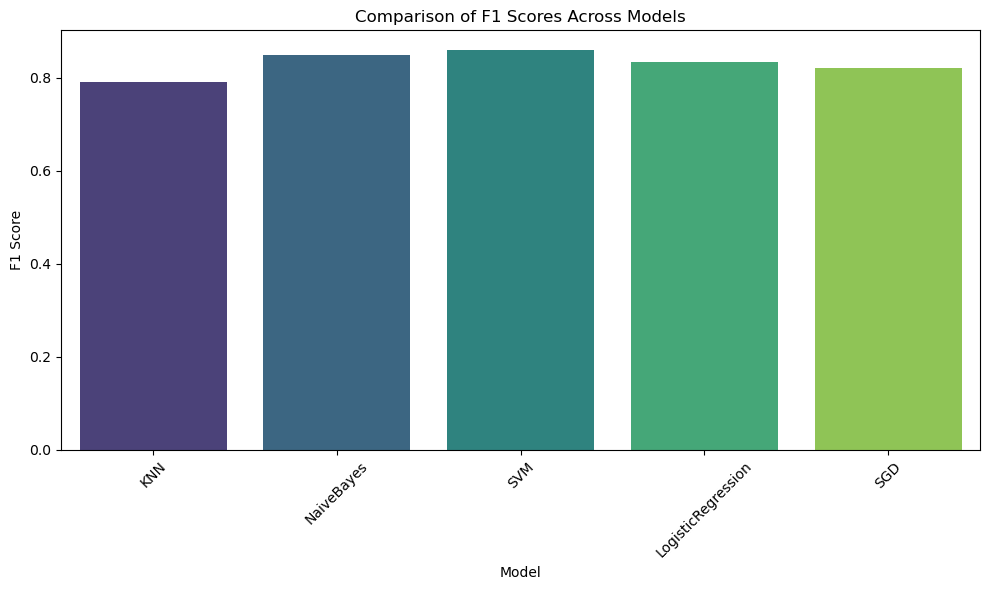

In [4]:
# === Visualizations ===
import matplotlib.pyplot as plt
import seaborn as sns
# 1. Bar Plot to compare F1-score across models
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='F1-Score', data=results_df, palette='viridis')
plt.title('Comparison of F1 Scores Across Models')
plt.xlabel('Model')
plt.ylabel('F1 Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('results/f1_comparison_barplot.png')
plt.show()

/var/folders/wx/q14bm8054cb77_k6246tdlg00000gn/T/ipykernel_1734/2496567394.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=results_df, palette='viridis')


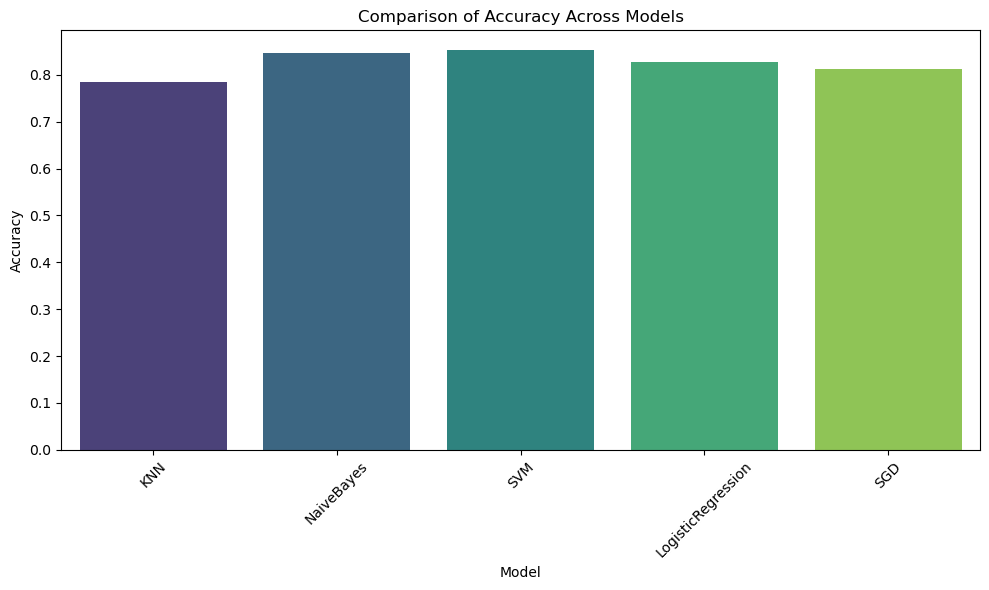

In [5]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=results_df, palette='viridis')
plt.title('Comparison of Accuracy Across Models')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('results/Accuracy_comparison_barplot.png')
plt.show()

/var/folders/wx/q14bm8054cb77_k6246tdlg00000gn/T/ipykernel_1734/2872159505.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Precision', data=results_df, palette='viridis')


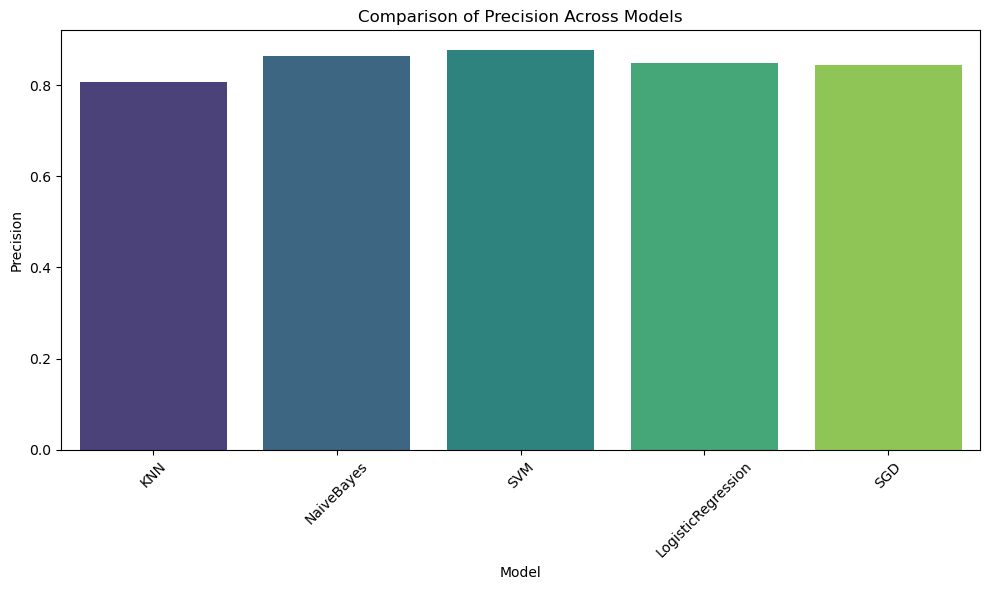

In [6]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Precision', data=results_df, palette='viridis')
plt.title('Comparison of Precision Across Models')
plt.xlabel('Model')
plt.ylabel('Precision')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('results/Precision_comparison_barplot.png')
plt.show()

/var/folders/wx/q14bm8054cb77_k6246tdlg00000gn/T/ipykernel_1734/3661161745.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Recall', data=results_df, palette='viridis')


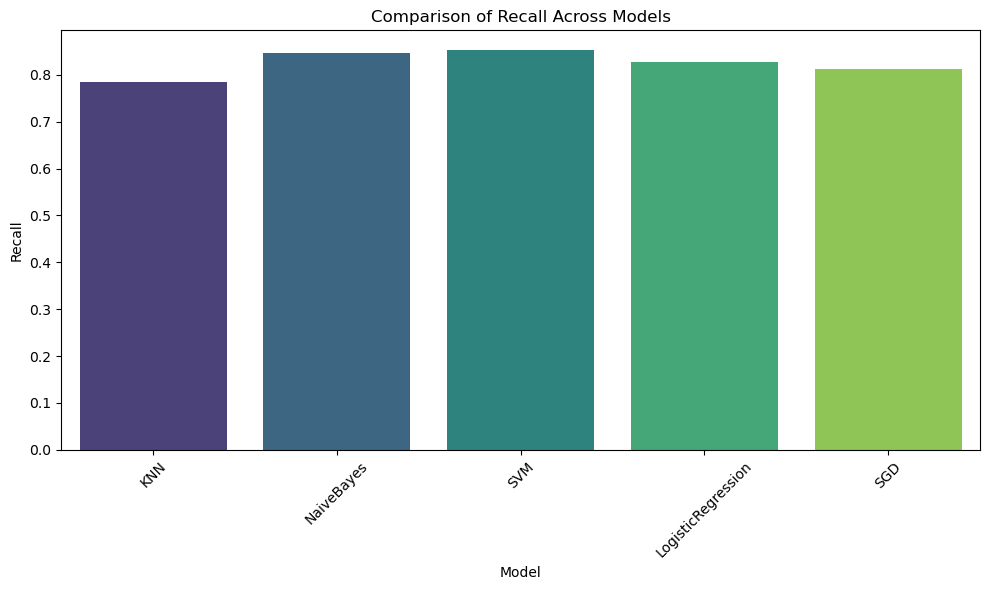

In [7]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Recall', data=results_df, palette='viridis')
plt.title('Comparison of Recall Across Models')
plt.xlabel('Model')
plt.ylabel('Recall')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('results/Recall_comparison_barplot.png')
plt.show()

In [8]:
results_df.head()

,Accuracy,Precision,Recall,F1-Score,Model
0,0.785289,0.807427,0.785289,0.790875,KNN
1,0.845636,0.865050,0.845636,0.848511,NaiveBayes
2,0.852370,0.876445,0.852370,0.858677,SVM
3,0.826729,0.848559,0.826729,0.833060,LogisticRegression
4,0.811448,0.844377,0.811448,0.820059,SGD


In [10]:
# Print out the first few rows of the metrics DataFrame
print(results_df.head())


   Accuracy  Precision    Recall  F1-Score               Model
0  0.785289   0.807427  0.785289  0.790875                 KNN
1  0.845636   0.865050  0.845636  0.848511          NaiveBayes
2  0.852370   0.876445  0.852370  0.858677                 SVM
3  0.826729   0.848559  0.826729  0.833060  LogisticRegression
4  0.811448   0.844377  0.811448  0.820059                 SGD


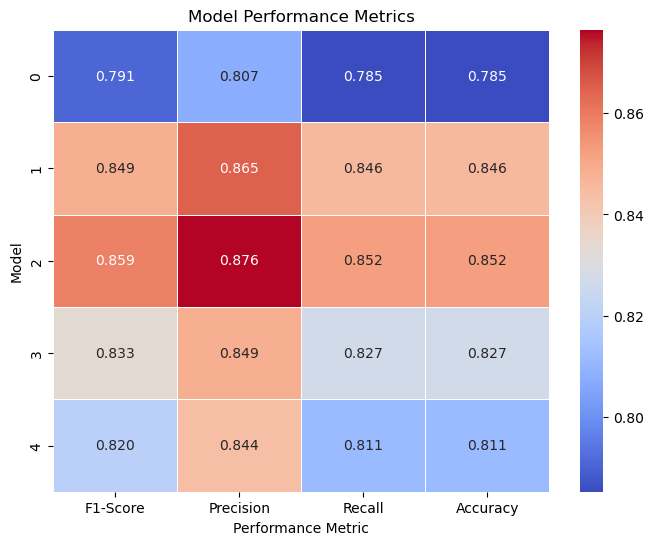

In [11]:


# Select the performance metrics
performance_metrics = ['F1-Score', 'Precision', 'Recall', 'Accuracy']
model_performance = results_df[performance_metrics]

# Plot the heatmap of the actual performance metrics
plt.figure(figsize=(8, 6))
sns.heatmap(model_performance, annot=True, cmap='coolwarm', fmt=".3f", linewidths=0.5)
plt.title('Model Performance Metrics')
plt.ylabel('Model')
plt.xlabel('Performance Metric')
plt.show()